<h1 style="font-weight:bold;color:#5E6C6B;text-align:center">Projet</h1>

<h3 style="font-weight:bold;color:#74857E;text-align:left">Objectif :</h3>
</p>
Ouvrages de référence (dataset donné)</p>
<p>

Le projet de Data Mining Regression / Classification est une initiative axée sur l'exploration, l'analyse et la modélisation de données pour en extraire des informations précieuses. Il se divise en deux principales composantes : la régression ou la classification à implémenter.
Python / Jupyter Lab ou Google Colab / Sklearn / Pandas / NumPy / Matplotlib</p>

<h3 style="font-weight:bold;color:#74857E;text-align:left">Étapes : Importations</h3>

In [453]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (LogisticRegression, LinearRegression)
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc, mean_squared_error)
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_classification

# Définir le chemin vers le fichier CSV
file_path = 'dataset.csv' 

# Charger le dataset
dataset = pd.read_csv(file_path)
pd.set_option('display.max_columns', None)

def keep_useful_columns(df): # Pour conserver uniquement les colonnes qui nous intéressent
    return df[['State', 'Agency type', 'Agency name', 'Race', 'Religion', 'Sexual orientation', 'Ethnicity', 'Disability', 'Gender', 'Gender Identity', '1st quarter', '2nd quarter', '3rd quarter', '4th quarter', 'Population']]

# Appliquer la fonction pour conserver les colonnes utiles
df = keep_useful_columns(dataset)

# Afficher le dataframe pour lancer l'analyse
df

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
0,Alabama,Cities,Florence,2,0,0,0,0,0,0.0,0.0,1.0,0.0,1.0,"39,481"
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,"84,139"
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0.0,1.0,0.0,1.0,0.0,"35,154"
3,Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,"94,126"
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0.0,2.0,3.0,3.0,0.0,"299,455"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,Wisconsin,Nonmetropolitan Counties,Grant,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,NaN
1822,Wisconsin,Nonmetropolitan Counties,Lincoln,0,0,1,0,0,0,0.0,1.0,0.0,0.0,0.0,NaN
1823,Wisconsin,Nonmetropolitan Counties,Manitowoc,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,NaN
1824,Wisconsin,Nonmetropolitan Counties,Oneida,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,NaN


<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Tri</h5

In [454]:
df.head()

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
0,Alabama,Cities,Florence,2,0,0,0,0,0,0.0,0.0,1.0,0.0,1.0,"39,481"
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,"84,139"
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0.0,1.0,0.0,1.0,0.0,"35,154"
3,Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,"94,126"
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0.0,2.0,3.0,3.0,0.0,"299,455"


In [455]:
df.columns

Index(['State', 'Agency type', 'Agency name', 'Race', 'Religion',
       'Sexual orientation', 'Ethnicity', 'Disability', 'Gender',
       'Gender Identity', '1st quarter', '2nd quarter', '3rd quarter',
       '4th quarter', 'Population'],
      dtype='object')

In [456]:
missing_values = df.isna().sum() # détecter et compter les valeurs manquantes dans chaque colonne

In [457]:
df = df.fillna("Inconnu") # remplacer toutes les valeurs manquantes

In [458]:
colonnes_numeriques = ['Population','Race','Religion','Sexual orientation','Ethnicity','Disability','Gender','Gender Identity','1st quarter','2nd quarter','3rd quarter','4th quarter']
df[colonnes_numeriques] = df[colonnes_numeriques].apply(pd.to_numeric, errors='coerce')
df = df.drop_duplicates()

#transforme les valeurs des colonnes spécifiées en nombres, gère les valeurs non numériques en les remplaçant par NaN, et supprime les lignes dupliquées

<h3 style="font-weight:bold;color:#74857E;text-align:left">Tri</h3>

<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Graphique du total des crimes par Etat</h5>

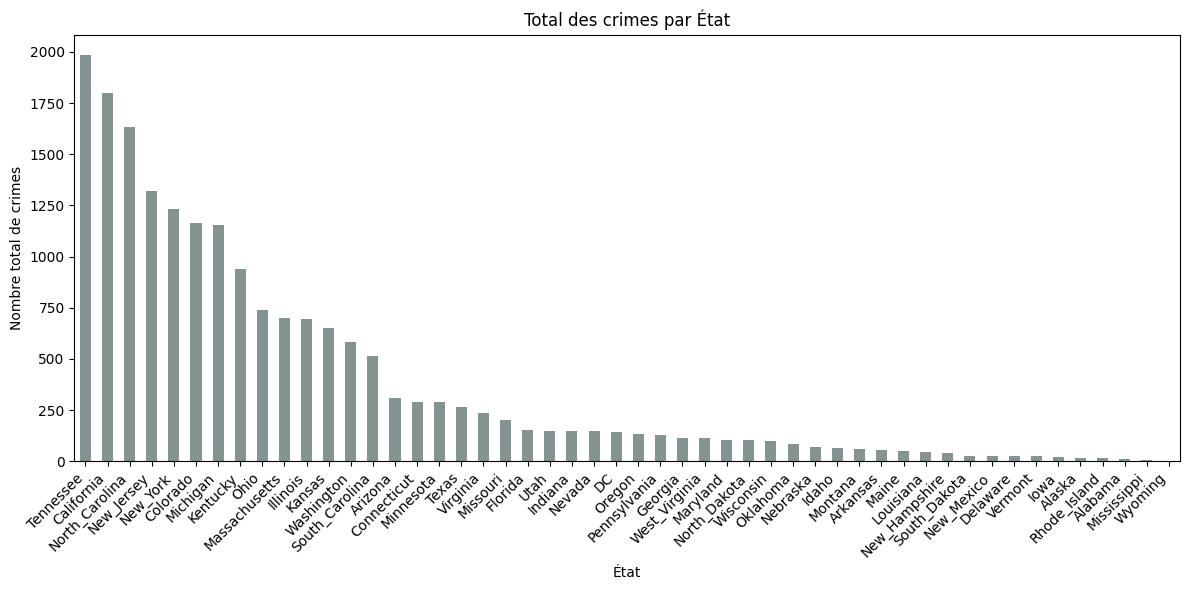

In [459]:
# Calculer le total des crimes par État
total_crimes_by_state = df.groupby('State')[colonnes_numeriques].sum()

# Calculer le total des crimes pour chaque État
total_crimes = total_crimes_by_state.sum(axis=1)

# Tracer le graphique à barres
plt.figure(figsize=(12, 6))
total_crimes.sort_values(ascending=False).plot(kind='bar', color='#859393')
plt.title('Total des crimes par État')
plt.xlabel('État')
plt.ylabel('Nombre total de crimes')
plt.xticks(rotation=45, ha='right')  # Pour faire pivoter les étiquettes d'État
plt.tight_layout()
plt.show()


<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Afin d'avoir une visualisation plus nette des chiffres, voici le résultat sous forme de liste</h5>


In [460]:
# Liste des colonnes de types de crimes
colonnes_crimes_haineux = ['Race', 'Religion', 'Sexual orientation', 'Ethnicity', 'Disability', 'Gender', 'Gender Identity']

# Calculer la somme des crimes par État, ajouter une colonne 'Total Crimes', et trier en ordre décroissant
total_crimes_by_state = df.groupby('State')[colonnes_crimes_haineux].sum().sum(axis=1).sort_values(ascending=False)

print(total_crimes_by_state)


State
California        843.0
New_York          615.0
New_Jersey        414.0
Ohio              370.0
Massachusetts     350.0
Michigan          329.0
Washington        291.0
Tennessee         196.0
Kentucky          171.0
Arizona           155.0
Connecticut       145.0
Minnesota         144.0
Texas             132.0
Colorado          128.0
Virginia          119.0
North_Carolina    118.0
Illinois          105.0
Missouri          102.0
Florida            76.0
Indiana            75.0
Utah               75.0
Nevada             73.0
DC                 72.0
Oregon             66.0
Pennsylvania       64.0
Kansas             64.0
Georgia            57.0
West_Virginia      56.0
South_Carolina     51.0
Maryland           51.0
North_Dakota       51.0
Wisconsin          50.0
Oklahoma           41.0
Nebraska           36.0
Idaho              32.0
Montana            31.0
Arkansas           27.0
Maine              25.0
Louisiana          22.0
New_Hampshire      21.0
South_Dakota       13.0
New_Mexico

<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Etat avec le plus grand nombre de crimes</h5>

In [461]:

# Définir les colonnes des crimes
colonnes_crimes = ['Race', 'Religion', 'Sexual orientation', 'Ethnicity', 'Disability', 'Gender', 'Gender Identity']

# Créer la colonne 'Total Crimes' en sommant les colonnes des crimes
df['Total Crimes'] = df[colonnes_crimes].sum(axis=1)

# Grouper par État et faire la somme des crimes haineux
total_crimes_par_etat = df.groupby('State')['Total Crimes'].sum().reset_index()

# Trier le DataFrame par ordre décroissant de crimes haineux
total_crimes_par_etat = total_crimes_par_etat.sort_values(by='Total Crimes', ascending=False)

# Afficher l'État avec le plus grand nombre de crimes haineux
etat_max_crimes = total_crimes_par_etat.iloc[0]['State']
nombre_max_crimes = total_crimes_par_etat.iloc[0]['Total Crimes']

print(f"L'État avec le plus grand nombre de crimes haineux est : {etat_max_crimes} avec {nombre_max_crimes} crimes.")


L'État avec le plus grand nombre de crimes haineux est : California avec 843.0 crimes.


<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Etat avec le plus petit nombre de crimes</h5>

In [462]:
# Définir les colonnes des crimes
#colonnes_crimes = ['Race', 'Religion', 'Sexual orientation', 'Ethnicity', 'Disability', 'Gender', 'Gender Identity']

# Créer la colonne 'Total Crimes' en sommant les colonnes des crimes
#df['Total Crimes'] = df[colonnes_crimes].sum(axis=1)

# Grouper par État et faire la somme des crimes haineux
#total_crimes_par_etat = df.groupby('State')['Total Crimes'].sum().reset_index()


# Trier le DataFrame par ordre croissant de crimes haineux
total_crimes_par_etat = total_crimes_par_etat.sort_values(by='Total Crimes', ascending=True)

# Afficher l'État avec le moins de crimes haineux en 2013
etat_min_crimes = total_crimes_par_etat.iloc[0]['State']
nombre_min_crimes = total_crimes_par_etat.iloc[0]['Total Crimes']

print(f"L'État avec le moins de crimes haineux en 2013 est : {etat_min_crimes} avec {nombre_min_crimes} crimes.")


L'État avec le moins de crimes haineux en 2013 est : Wyoming avec 1.0 crimes.


<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Nombre totale de crimes en 2013</h5>

In [463]:
# Calculer le nombre total de crimes haineux en 2013
total_crimes = df['Total Crimes'].sum()

print(f"Le nombre total de crimes haineux en 2013 est : {total_crimes}")

Le nombre total de crimes haineux en 2013 est : 5928.0



<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Crime le plus fréquent par Etat</h5>

In [464]:

colonnes_crimes = ['Race', 'Religion', 'Sexual orientation', 'Ethnicity', 'Disability', 'Gender', 'Gender Identity']

# Grouper par État et calculer les totaux pour chaque type de crime
total_crimes_par_etat = df.groupby('State')[colonnes_crimes].sum()

# Trouver le crime le plus fréquent par État
crime_le_plus_frequent_par_etat = total_crimes_par_etat.idxmax(axis=1)

# Afficher le résultat
print("Crime le plus fréquent par État :")
print(crime_le_plus_frequent_par_etat)


Crime le plus fréquent par État :
State
Alabama                         Race
Alaska                          Race
Arizona                         Race
Arkansas                        Race
California                      Race
Colorado                        Race
Connecticut                     Race
DC                Sexual orientation
Delaware                        Race
Florida                         Race
Georgia                         Race
Idaho                           Race
Illinois                        Race
Indiana                         Race
Iowa                            Race
Kansas                          Race
Kentucky                        Race
Louisiana         Sexual orientation
Maine                           Race
Maryland                        Race
Massachusetts                   Race
Michigan                        Race
Minnesota                       Race
Mississippi                     Race
Missouri                        Race
Montana                         Rac


<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Carte de chaleur du crime le plus fréquent par Etat</h5>

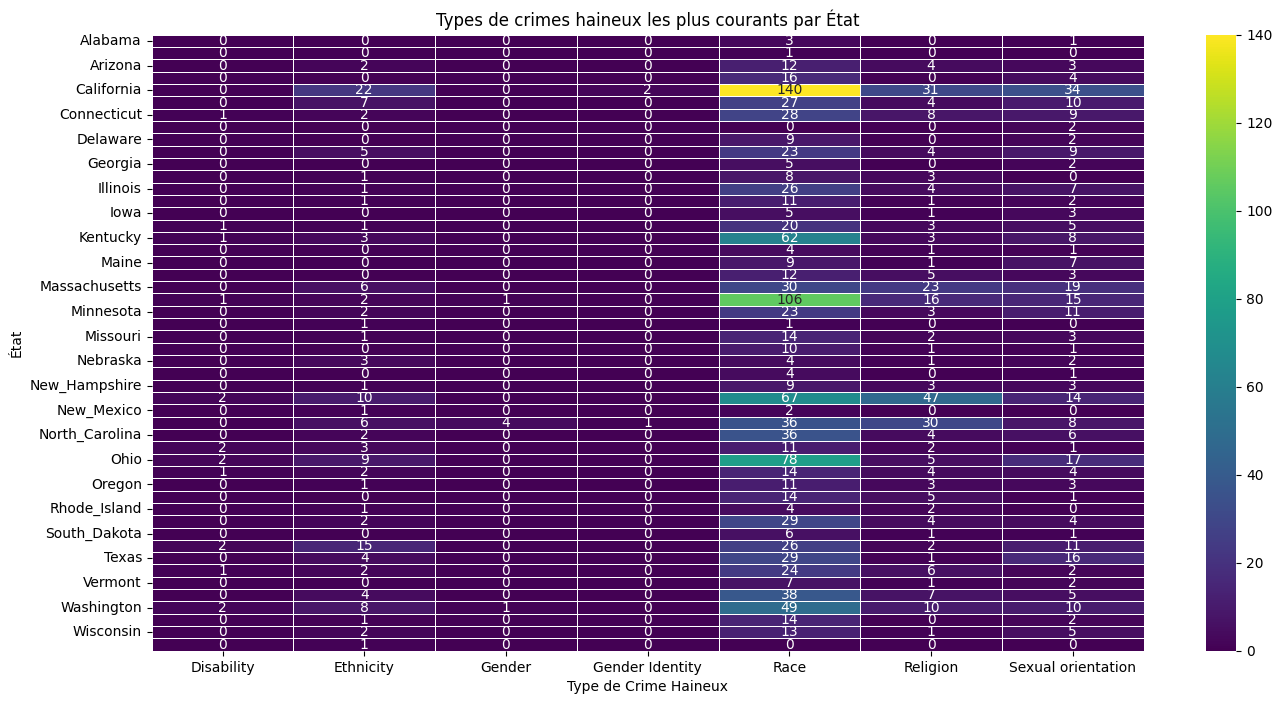

In [465]:
# Sélectionner les colonnes pertinentes pour les types de crimes haineux
colonnes_crimes_haineux = ["Race", "Religion", "Sexual orientation", "Ethnicity", "Disability", "Gender", "Gender Identity"]

# Créer une colonne 'Type de Crime Max' indiquant le type de crime haineux le plus courant pour chaque État
df['Type de Crime Max'] = df[colonnes_crimes_haineux].idxmax(axis=1)

# Compter le nombre d'occurrences de chaque type de crime haineux par État
occurrences_par_etat = df.groupby('State')['Type de Crime Max'].value_counts().unstack().fillna(0)

# Visualiser les types de crimes haineux les plus courants par État
plt.figure(figsize=(16, 8))
sns.heatmap(occurrences_par_etat, cmap='viridis', annot=True, fmt='g', linewidths=.5)
plt.title('Types de crimes haineux les plus courants par État')
plt.xlabel('Type de Crime Haineux')
plt.ylabel('État')
plt.show()

<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Pourcentage total des crimes pour chaque type de crime</h5>

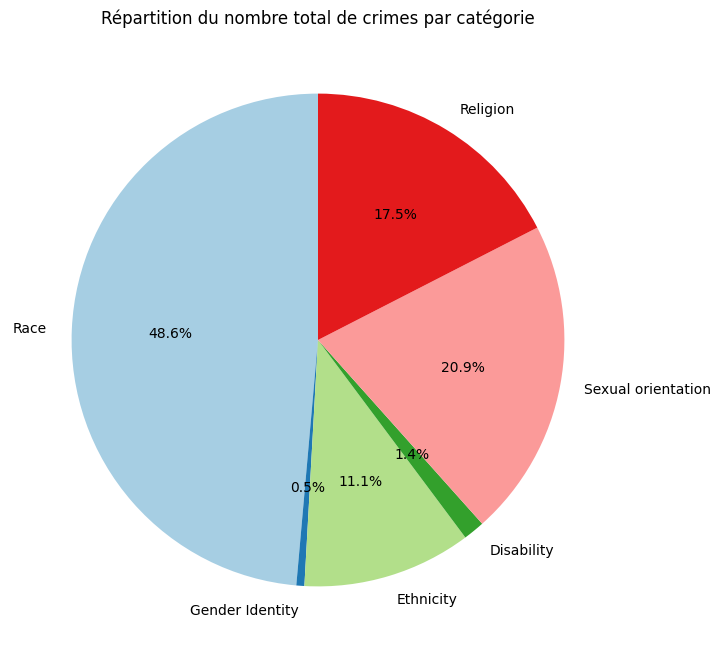

In [466]:

colonnes_crimes_haineux = ['Race','Gender Identity', 'Ethnicity', 'Disability', 'Sexual orientation','Religion',]

total_crimes_by_column = df[colonnes_crimes_haineux].sum()

# Créer un graphique camembert pour le nombre total de crimes par colonne
plt.figure(figsize=(8, 8))
total_crimes_by_column.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Répartition du nombre total de crimes par catégorie")
plt.ylabel('')
plt.show()




<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Incidents liés à l'orientation sexuelle au cours de l'année 2013 -> permet de voir si les chiffres données au dessus sont bien corrects</h5>

In [ ]:

# Assurer que toutes les colonnes pertinentes sont numériques et gérer les valeurs manquantes
cols_to_sum = ['Race', 'Religion', 'Sexual orientation', 'Ethnicity', 'Disability', 'Gender', 'Gender Identity']
dataset[cols_to_sum] = dataset[cols_to_sum].apply(pd.to_numeric, errors='coerce').fillna(0)

# Calcul du nombre total d'incidents liés à l'orientation sexuelle
total_orientation_sexuelle_incidents = dataset['Sexual orientation'].sum()

# Calcul du nombre total d'incidents pour toutes les catégories
total_incidents = dataset[cols_to_sum].sum().sum()

# Calcul du taux d'incidents liés à l'orientation sexuelle
taux_orientation_sexuelle = (total_orientation_sexuelle_incidents / total_incidents) * 100

print("Taux d'incidents liés à l'orientation sexuelle :", taux_orientation_sexuelle, "%")


Taux d'incidents liés à l'orientation sexuelle : 20.867071524966263 %


<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Afin de mieux se rendre compte des chiffres évoqués, voici une liste et un graphique avec les nombres de crimes par catégorie</h5>

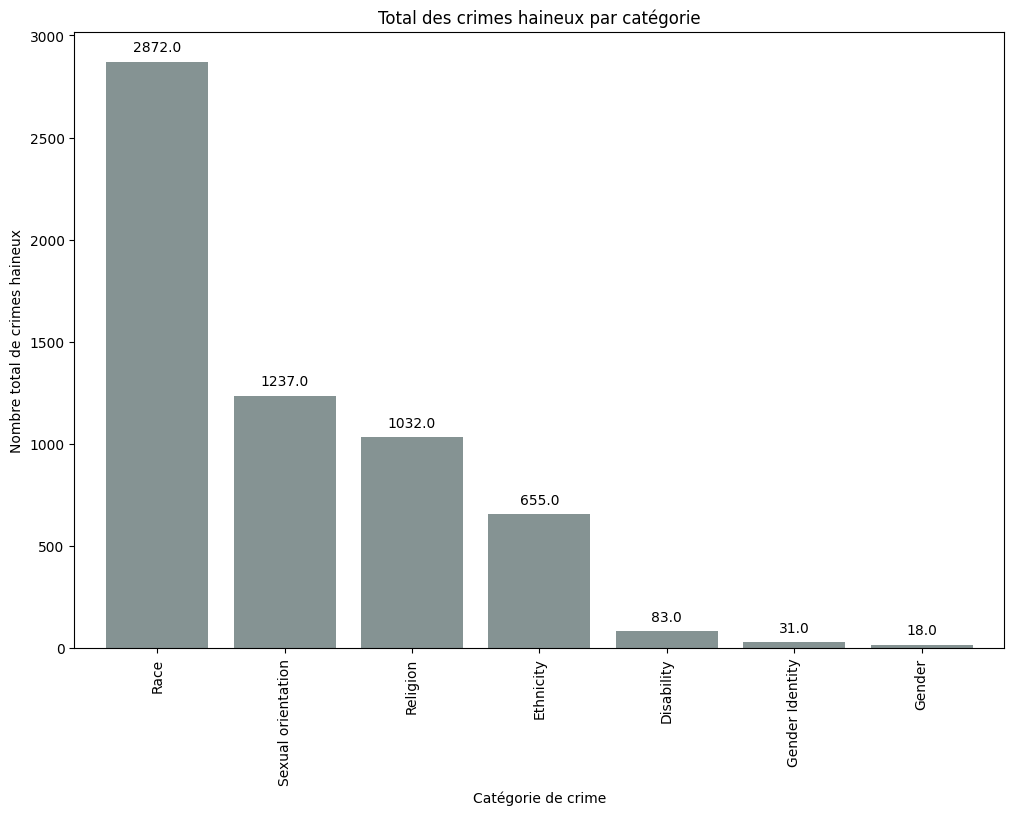

In [467]:

# Liste des colonnes à considérer
colonnes_crimes_haineux = ['Race', 'Religion', 'Sexual orientation', 'Ethnicity', 'Disability', 'Gender', 'Gender Identity']

# Calculer la somme totale des crimes pour chaque catégorie
total_crimes_par_categorie = df[colonnes_crimes_haineux].sum()

# Trier les données en ordre décroissant pour l'affichage
total_crimes_par_categorie_sorted = total_crimes_par_categorie.sort_values(ascending=False)

# Affichage du graphique en barres
ax = total_crimes_par_categorie_sorted.plot.bar(figsize=(12, 8), width=0.8, color='#859393')
ax.set_ylabel('Nombre total de crimes haineux')
ax.set_xlabel('Catégorie de crime')
ax.set_title('Total des crimes haineux par catégorie')

# Ajouter les valeurs au-dessus des barres
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Répartir total du pourcentage de crime par saison</h5>

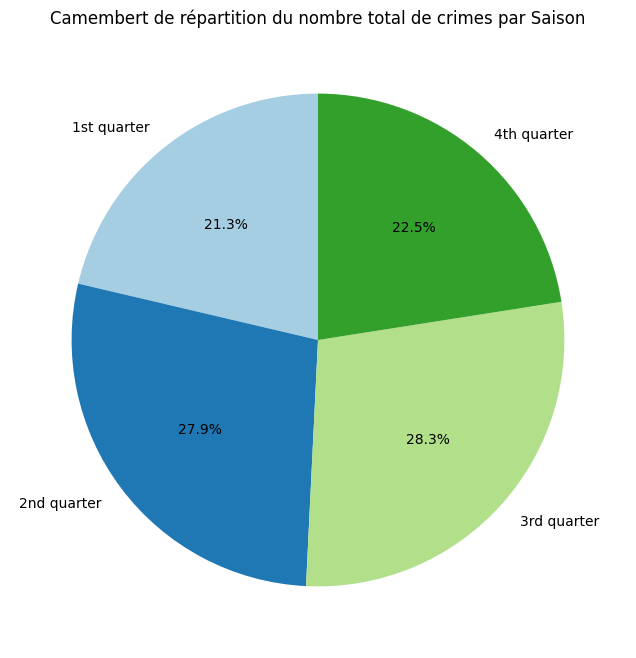

In [468]:

# Sélectionner les colonnes des trimestres
quarter_columns = ['1st quarter', '2nd quarter', '3rd quarter', '4th quarter']

# Convertir les colonnes des trimestres en format numérique avec gestion des NaN
df[quarter_columns] = df[quarter_columns].apply(pd.to_numeric, errors='coerce')

# Calculer le total des crimes pour chaque trimestre
total_crimes_by_quarter = df[quarter_columns].sum()

# Créer un graphique camembert pour le nombre total de crimes par trimestre
plt.figure(figsize=(8, 8))
total_crimes_by_quarter.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Camembert de répartition du nombre total de crimes par Saison")
plt.ylabel('')
plt.show()



<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Afin d'avoir une meilleure visibilité, nous vous proposons un graphique en barre des variations saisonnières pour les crimes reportés</h5>

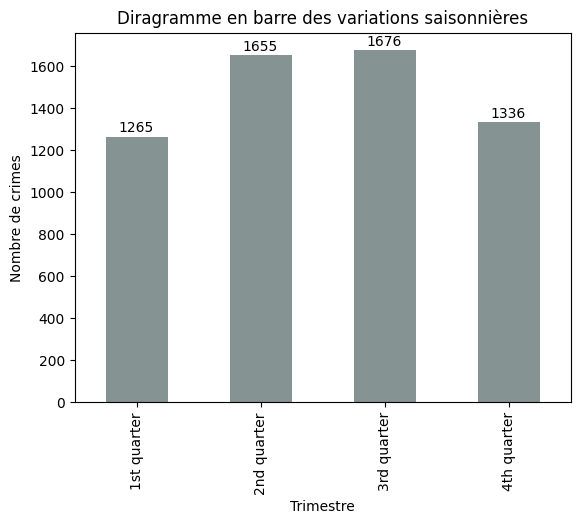

In [469]:

# Remplacer toutes les valeurs manquantes par 0
df[['1st quarter', '2nd quarter', '3rd quarter', '4th quarter']] = df[['1st quarter', '2nd quarter', '3rd quarter', '4th quarter']].fillna(0)

# Ajouter une colonne 'Total Crimes' qui contient la somme des crimes pour chaque ligne
df['Total Crimes'] = df[['1st quarter', '2nd quarter', '3rd quarter', '4th quarter']].sum(axis=1)

# Visualiser les variations saisonnières
seasonal_counts = df[['1st quarter', '2nd quarter', '3rd quarter', '4th quarter']].sum()
ax = seasonal_counts.plot(kind='bar', color='#859393')
plt.title('Diragramme en barre des variations saisonnières')
plt.xlabel('Trimestre')
plt.ylabel('Nombre de crimes')

# Ajouter les nombres exactes au-dessus de chaque barre
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 6), textcoords='offset points')

plt.show()


<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Les types d'agences</h5>

In [470]:
# Afficher tous les types d'agences présents dans la colonne 'Agency type'
types_agences = df['Agency type'].unique()

# Afficher la liste des types d'agences
print("Types d'agences présents dans la colonne 'Agency type':")
for agence in types_agences:
    print(agence)

Types d'agences présents dans la colonne 'Agency type':
Cities
Universities and Colleges
Metropolitan Counties
Nonmetropolitan Counties
State Police Agencies
Other Agencies


<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Le nombre de crimes recensés par chaque type d'agence</h5>

In [471]:
# Grouper par type d'agence et faire la somme des crimes haineux
total_crimes_par_agence = df.groupby('Agency type')['Total Crimes'].sum().reset_index()

# Afficher le nombre de crimes recensés par chaque agence
print(total_crimes_par_agence)

                 Agency type  Total Crimes
0                     Cities        4696.0
1      Metropolitan Counties         773.0
2   Nonmetropolitan Counties         138.0
3             Other Agencies          52.0
4      State Police Agencies          72.0
5  Universities and Colleges         201.0


<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Le type d'agence qui signale le plus de crimes </h5>

In [472]:
# Grouper par type d'agence et faire la somme des crimes haineux
total_crimes_par_type_agence = df.groupby('Agency type')['Total Crimes'].sum().reset_index()
# Trier la DataFrame par ordre décroissant du nombre total de crimes
total_crimes_par_type_agence = total_crimes_par_type_agence.sort_values(by='Total Crimes', ascending=False)
# Afficher le type d'agence qui signale le plus de crimes haineux
type_agence_max_crimes = total_crimes_par_type_agence.iloc[0]['Agency type']
nombre_max_crimes = total_crimes_par_type_agence.iloc[0]['Total Crimes']

print(f"Le type d'agence qui signale le plus de crimes haineux est {type_agence_max_crimes} avec {nombre_max_crimes} crimes.")

Le type d'agence qui signale le plus de crimes haineux est Cities avec 4696.0 crimes.


<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Le type d'agence qui signale le moins de crimes</h5>

In [473]:
# Grouper par type d'agence et faire la somme des crimes haineux
total_crimes_par_type_agence = df.groupby('Agency type')['Total Crimes'].sum().reset_index()

# Trier la DataFrame par ordre croissant du nombre total de crimes
total_crimes_par_type_agence = total_crimes_par_type_agence.sort_values(by='Total Crimes', ascending=True)

# Afficher le type d'agence qui signale le moins de crimes haineux
type_agence_min_crimes = total_crimes_par_type_agence.iloc[0]['Agency type']
nombre_min_crimes = total_crimes_par_type_agence.iloc[0]['Total Crimes']

print(f"Le type d'agence qui signale le moins de crimes haineux est {type_agence_min_crimes} avec {nombre_min_crimes} crimes.")

Le type d'agence qui signale le moins de crimes haineux est Other Agencies avec 52.0 crimes.




<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Nom de toutes les agences </h5>

In [474]:
# Afficher tous les noms des agences présents dans la colonne 'Agency name'
noms_agences = df['Agency name'].unique()

# Afficher la liste des noms d'agences
print("Noms d'agences présents dans la colonne 'Agency name':")
for agence in noms_agences:
    print(agence)

Noms d'agences présents dans la colonne 'Agency name':
Florence
Hoover
Prattville
Tuscaloosa
Anchorage
Apache Junction
Avondale
Eagar
El Mirage
Gilbert
Glendale
Goodyear
Maricopa
Mesa
Phoenix
Prescott
Scottsdale
Tempe
Tucson
Yuma
Northern Arizona University
University of Arizona
Cochise
Pima
Bentonville
Berryville
Cabot
England
Fairfield Bay
Fort Smith
Gurdon
Marion
North Little Rock
Pine Bluff
Rogers
Sherwood
University of Arkansas, Pine Bluff
Crawford
Faulkner
Lonoke
Pulaski
Sebastian
Greene
Pope
Adelanto
Agoura Hills
Alameda
Alhambra
Antioch
Arcadia
Atascadero
Atwater
Auburn
Azusa
Bakersfield
Baldwin Park
Banning
Berkeley
Beverly Hills
Brentwood3
Buena Park3
Burbank
Calabasas
Camarillo
Campbell
Carlsbad
Carson
Cerritos
Chico
Chino
Chula Vista
Citrus Heights
Claremont
Clearlake
Clovis
Colton
Compton
Concord
Corcoran
Corona
Coronado
Costa Mesa
Covina
Cupertino
Cypress
Daly City
Dana Point
Davis
Duarte
El Cajon
El Cerrito
Elk Grove
El Monte
Emeryville
Encinitas
Escondido
Eureka
Fairfie

<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Nombre de crimes recensés par les 10 agences ayant enregistré le plus de crimes </h5>

In [475]:
# Grouper par nom d'agence et calculer le total des crimes pour chaque agence
total_crimes_par_agence = df.groupby('Agency name')['Total Crimes'].sum()

# Trier les résultats par ordre décroissant et sélectionner les 10 premiers
top_10_agences = total_crimes_par_agence.sort_values(ascending=False).head(10)

# Afficher les résultats
print("Nombre de crimes recensés par les 10 agences en ayant le plus :")
print(top_10_agences)

Nombre de crimes recensés par les 10 agences en ayant le plus :
Agency name
New York                                    314.0
Boston                                      165.0
Los Angeles                                 164.0
Columbus                                    137.0
Seattle                                      89.0
Suffolk County Police Department             87.0
Phoenix                                      81.0
Washington                                   77.0
Las Vegas Metropolitan Police Department     65.0
Kansas City                                  63.0
Name: Total Crimes, dtype: float64


<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Nombre de crimes recensés par les 10 agences ayant enregistré le moins de crimes </h5>

In [476]:
# Grouper par nom d'agence et calculer le total des crimes pour chaque agence
total_crimes_par_agence = df.groupby('Agency name')['Total Crimes'].sum()

# Trier les résultats par ordre croissant et sélectionner les 10 premiers
bottom_10_agences = total_crimes_par_agence.sort_values(ascending=True).head(10)

# Afficher les résultats
print("Nombre de crimes recensés par les 10 agences en ayant le moins :")
print(bottom_10_agences)

Nombre de crimes recensés par les 10 agences en ayant le moins :
Agency name
 State Police, St. Albans    1.0
Lomita                       1.0
Londonderry                  1.0
Lone Tree                    1.0
Trigg                        1.0
Long Beach Township          1.0
Longview                     1.0
Lonoke                       1.0
Los Alamitos                 1.0
Traverse City                1.0
Name: Total Crimes, dtype: float64


<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Y a-t-il une corrélation entre la taille de la population d'un État et le nombre de crimes haineux signalés ? </h5>

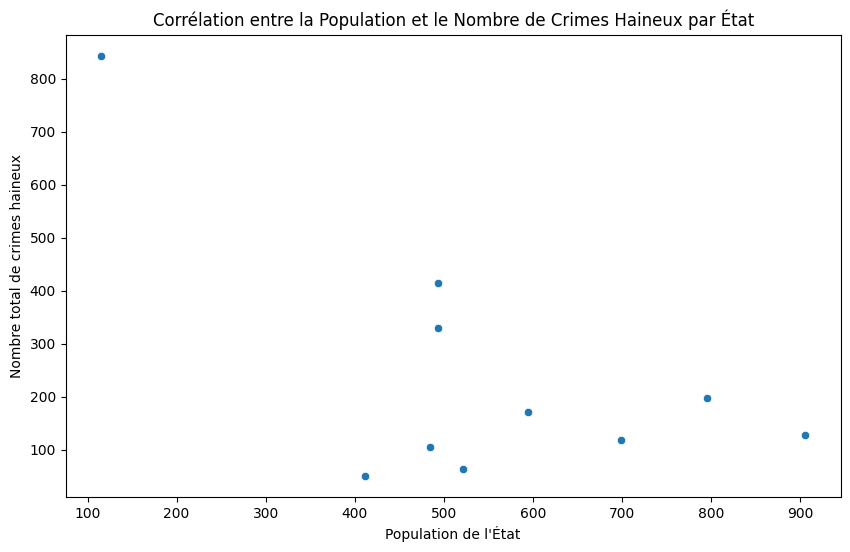

In [477]:

# Vérifier et convertir la colonne 'Population' en numérique
if df['Population'].dtype == 'object':
    df['Population'] = pd.to_numeric(df['Population'].str.replace(',', ''), errors='coerce')
else:
    df['Population'] = pd.to_numeric(df['Population'], errors='coerce')

# Grouper par État et calculer le total des crimes et la population moyenne pour chaque État
grouped_data = df.groupby('State').agg({'Total Crimes': 'sum', 'Population': 'mean'})

# Créer un graphique de dispersion
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped_data, x='Population', y='Total Crimes')
plt.title('Corrélation entre la Population et le Nombre de Crimes Haineux par État')
plt.xlabel('Population de l\'État')
plt.ylabel('Nombre total de crimes haineux')
plt.show()



<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Y a-t-il des saisons spécifiques de l'année où les crimes haineux sont plus fréquents durant l'année 2013 </h5>

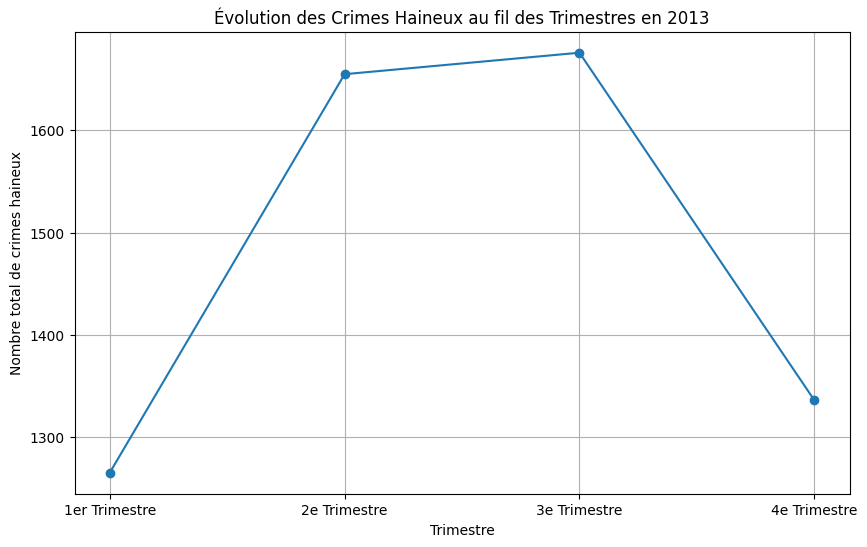

In [478]:
# Calculer le total des crimes pour chaque trimestre
total_crimes_par_trimestre = df[['1st quarter', '2nd quarter', '3rd quarter', '4th quarter']].sum()

# Créer un graphique pour visualiser l'évolution des crimes haineux au fil des trimestres
plt.figure(figsize=(10, 6))
total_crimes_par_trimestre.plot(kind='line', marker='o')
plt.title('Évolution des Crimes Haineux au fil des Trimestres en 2013')
plt.xlabel('Trimestre')
plt.ylabel('Nombre total de crimes haineux')
plt.xticks(range(len(total_crimes_par_trimestre)), ['1er Trimestre', '2e Trimestre', '3e Trimestre', '4e Trimestre'])
plt.grid(True)
plt.show()


<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Répartission des crimes haineux par types d'agence</h5>

C:\Users\balki\AppData\Local\Temp\ipykernel_7744\3182649234.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Agency type', data=df, palette='tab10')  # Utilisation d'une palette intégrée


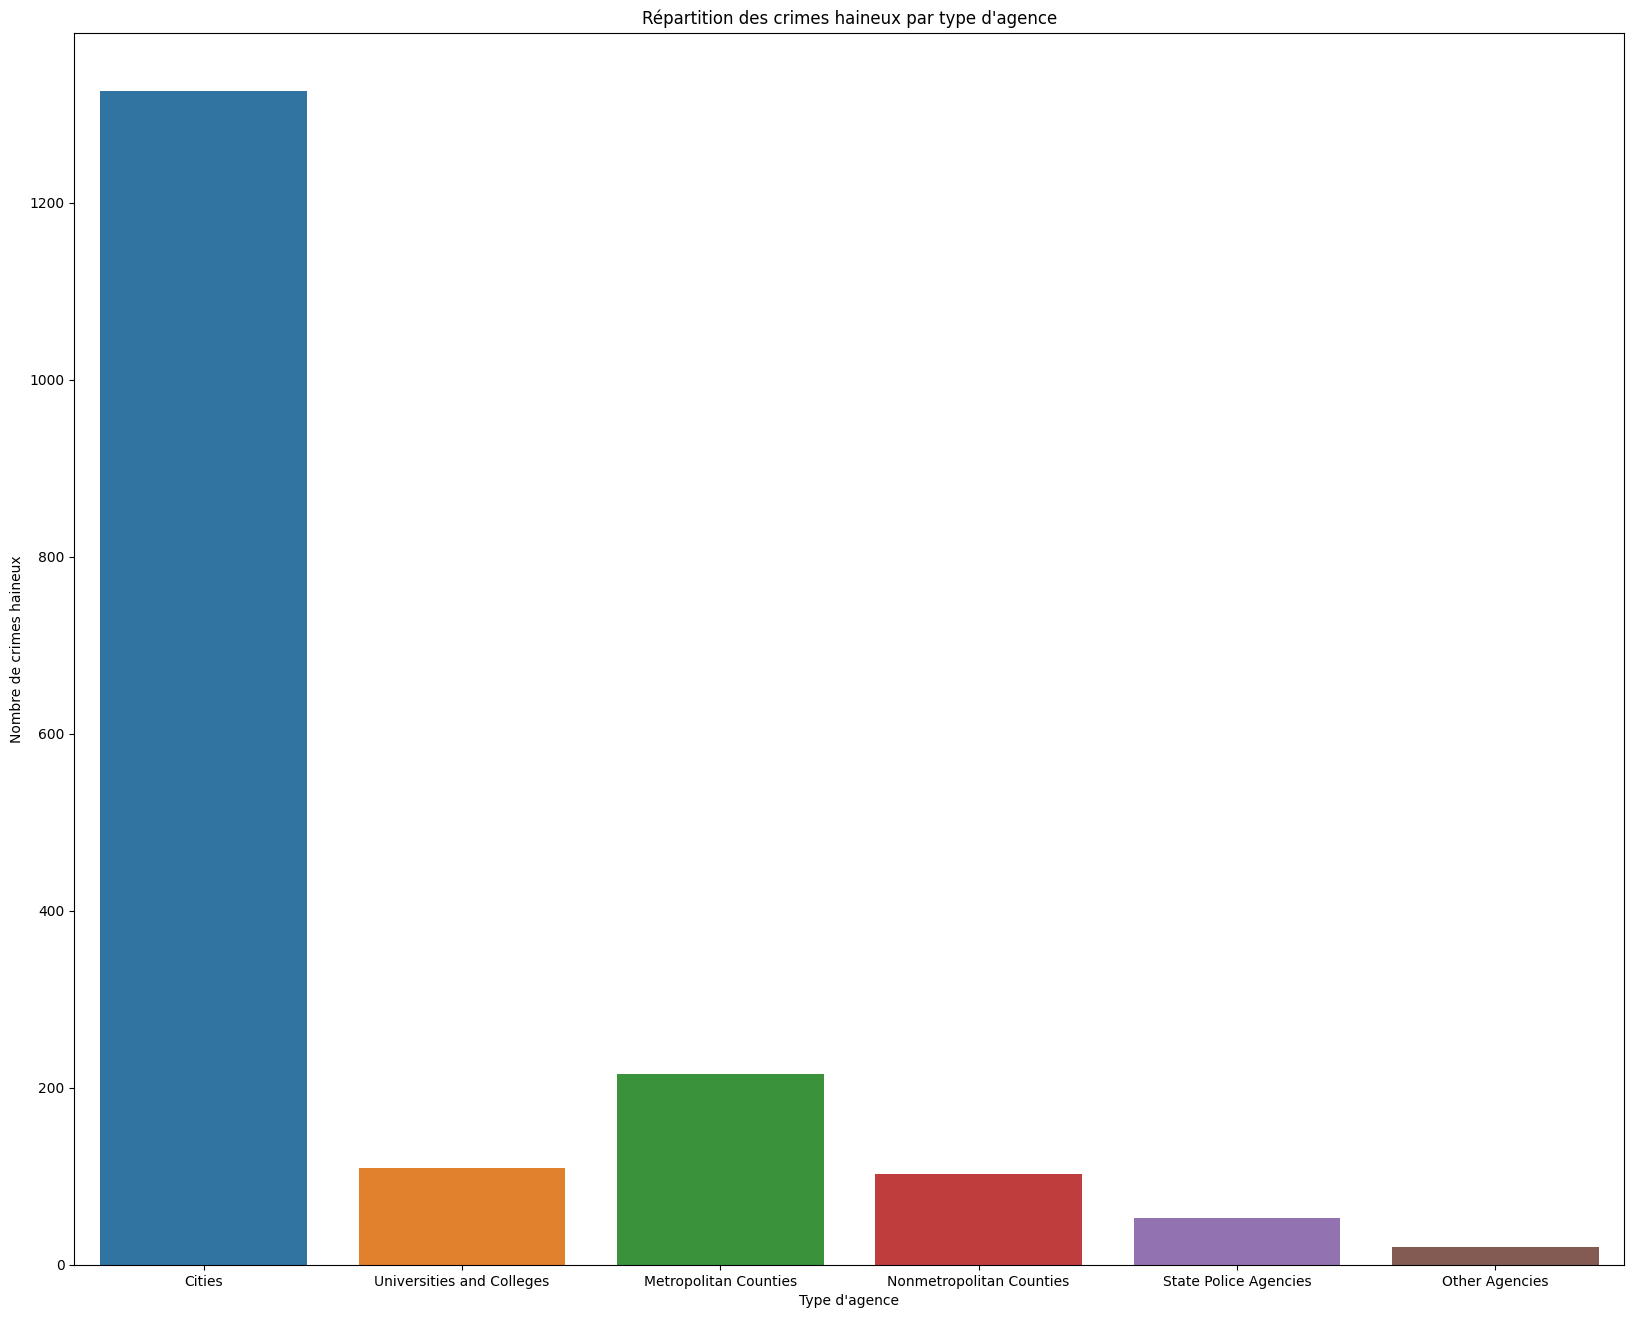

In [479]:
# Visualiser la répartition des crimes haineux par type d'agence
plt.figure(figsize=(20, 16))
sns.countplot(x='Agency type', data=df, palette='tab10')  # Utilisation d'une palette intégrée
plt.title('Répartition des crimes haineux par type d\'agence')
plt.xlabel('Type d\'agence')
plt.ylabel('Nombre de crimes haineux')
plt.show()



<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Regression.</h5>



<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Prédiction aléatoire du nombre d'incidents pour l'agence d'un Etat.</h5>

In [481]:

# Création de la colonne 'Total Incidents'
dataset['Total Incidents'] = dataset['1st quarter'] + dataset['2nd quarter'] + dataset['3rd quarter'] + dataset['4th quarter']

# Choix aléatoire d'une ville et d'une agence
ville_agence = dataset.sample(n=1)[['Agency name', 'State']]

# Préparation des données pour la régression pour cette ville et agence spécifiques
data_ville = dataset[(dataset['Agency name'] == ville_agence.iloc[0]['Agency name']) & 
                     (dataset['State'] == ville_agence.iloc[0]['State'])]

# Les variables indépendantes seront les différentes catégories (ex: race, religion, etc.)
X = data_ville[['Race', 'Religion', 'Sexual orientation', 'Ethnicity', 'Disability']]
y = data_ville['Total Incidents']  # La variable dépendante est le nombre total d'incidents

# Création et entraînement du modèle de régression linéaire avec le seul échantillon disponible
model = LinearRegression()
model.fit(X, y)

# Prédiction pour le même échantillon (à des fins d'illustration)
prediction = model.predict(X)

print("Prédiction du nombre d'incidents pour l'agence d'un Etat :", prediction[0])



Prédiction du nombre d'incidents pour l'agence d'un Etat : 14.0




<h5 style="font-weight:baold;color:#8C9D91;text-align:left">Prédiction des incidents liés à l'orientation sexuelle au cours de l'année 2014 pour chaque trimestre en Alabama.</h5>

In [482]:

# Filtrage des données pour le lieu spécifique (Alabama) et focus sur les incidents liés à l'orientation sexuelle
data_filtered = dataset[dataset['State'] == 'Alabama']
data_filtered['Total Incidents'] = data_filtered['1st quarter'] + data_filtered['2nd quarter'] + data_filtered['3rd quarter'] + data_filtered['4th quarter']

# Création d'une colonne 'Trimestre'
data_filtered['Trimester'] = np.tile([1, 2, 3, 4], len(data_filtered) // 4)

# Préparation des données pour la régression
X = data_filtered[['Trimester']]  # Variable indépendante: Trimestre
y = data_filtered['Sexual orientation']  # Variable dépendante

# Création et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)

# Préparation des données de test pour les prédictions
X_prediction = pd.DataFrame({'Trimester': [1, 2, 3, 4]})

# Utilisation du modèle pour faire des prédictions
predicted_incidents = model.predict(X_prediction)

# Création d'un DataFrame pour afficher les résultats
predictions_df = pd.DataFrame({
    'Trimester': X_prediction['Trimester'],
    'Predicted Incidents': predicted_incidents
})

print(predictions_df)

#ici la relation n'est pas linéaire donc les calculs peuvent paraîtres étranges 

   Trimester  Predicted Incidents
0          1                  0.4
1          2                  0.3
2          3                  0.2
3          4                  0.1


C:\Users\balki\AppData\Local\Temp\ipykernel_7744\3552974964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Total Incidents'] = data_filtered['1st quarter'] + data_filtered['2nd quarter'] + data_filtered['3rd quarter'] + data_filtered['4th quarter']
C:\Users\balki\AppData\Local\Temp\ipykernel_7744\3552974964.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Trimester'] = np.tile([1, 2, 3, 4], len(data_filtered) // 4)
